# Imágenes adaptables

Las  imágenes adaptables son imágenes que funcionan bien en dispositivos con una amplia diferencia de tamaño de pantallas, resoluciones y otras tantas características. Esto ayuda a mejorar el rendimiento en diferentes dispositivos.

## ¿Por qué imágenes adaptables?

Examinemos un escenario típico. Un sitio web típico puede contener una imagen de encabezado y algunas imágenes de contenido debajo del encabezado. Es probable que la imagen del encabezado abarque todo el ancho del encabezado y la imagen del contenido quepa en algún lugar dentro de la columna de contenido.

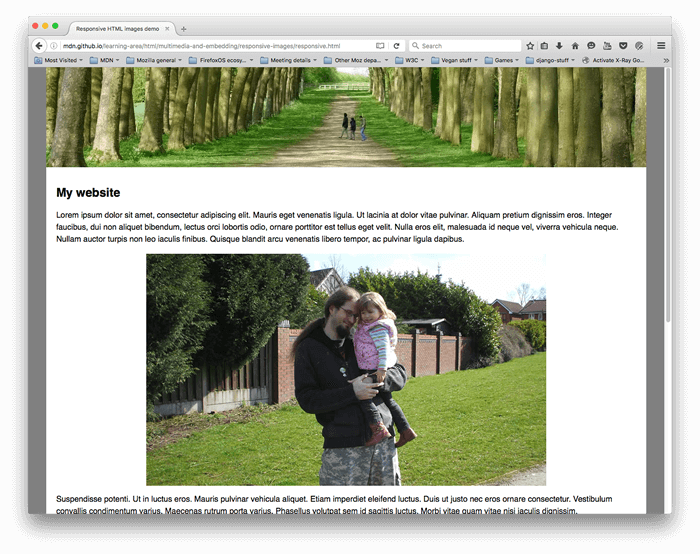

Esto funciona bien en un dispositivo de pantalla ancha, como una computadora portátil o de escritorio. No hablaremos mucho del CSS en esta lección, excepto para decir que:

* El contenido del body se ha ajustado a un ancho máximo de 1200 píxeles, en pantallas por encima de ese ancho, el cuerpo permanece a 1200px y se centra en el espacio disponible. En pantallas por debajo de ese ancho, el cuerpo permanecerá al 100% del ancho de la ventana.

* La imagen del encabezado se ha configurado para que su centro siempre permanezca en el centro del encabezado, sin importar el ancho que tenga el encabezado. Por lo tanto, si el sitio se visualiza en una pantalla más estrecha, aún se puede ver el detalle importante en el centro de la imagen (las personas) y el exceso se pierde en ambos lados. Tiene 200px de alto.
* Las imágenes de contenido se han configurado de modo que si el elemento body se vuelve más pequeño que la imagen, las imágenes comienzan a encogerse para permanecer siempre dentro del body, en lugar de desbordarlo.

Sin embargo, surgen problemas cuando comienza a ver el sitio en un dispositivo de pantalla estrecha — el encabezado de abajo está bien, pero empieza a ocupar gran parte de la altura de la pantalla de un dispositivo móvil. ¡A este tamaño es difícil ver a las personas que aparecen en la foto!

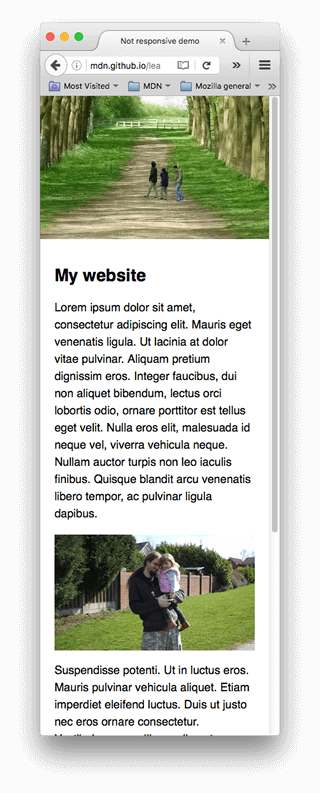

Una mejora sería mostrar una versión recortada de la imagen que muestra los detalles importantes de la imagen cuando el sitio se ve en una pantalla estrecha. Se podría mostrar una segunda imagen recortada para un dispositivo de pantalla de ancho medio, como una tableta. A esto se le conoce comúnmente como el __problema de cambio de resolución__.

Además, no es necesario incrustar imágenes más grandes en la página si se está viendo en una pantalla móvil. Y, a la inversa, una imagen rasterizada pequeña comienza a verse más pixelada cuando se muestra mayor que su tamaño original.

Por el contrario, no es necesario mostrar una imagen grande en una pantalla significativamente más pequeña que el tamaño para el que fue diseñada. Hacerlo puede desperdiciar ancho de banda; en particular, los usuarios de dispositivos móviles no quieren desperdiciar ancho de banda descargando una imagen grande destinada al escritorio, cuando una imagen pequeña sería suficiente para su dispositivo. Idealmente, tendría varias resoluciones disponibles y serviría el tamaño apropiado según el dispositivo que acceda a los datos en el sitio web.

Para hacer las cosas más complicadas, algunos dispositivos tienen pantallas de alta resolución que necesitan imágenes más grandes de las que se espera que luzcan bien. Esto es, básicamente, el mismo problema, pero en un contexto ligeramente diferente.

Podrías pensar que las imágenes vectoriales resolverían estos problemas, y lo hacen hasta cierto punto: son pequeñas en tamaño de archivo y escalan bien, y deberías usarlos siempre que sea posible. Sin embargo, no son adecuados para todos tipos de imágenes. Si bien son geniales para gráficos simples, patrones, elementos de interfaz, etc., es muy complejo crear una imagen basada en vectores con la cantidad de detalles que encontrarías, por ejemplo, en una foto. Formatos de imágenes rasterizadas como JPEG son más adecuados para el tipo de imágenes.

Este tipo de problemas no existían cuando la web se creó por primera vez, en ese entonces, los únicos dispositivos disponibles para navegar por la web eran los ordenadores de escritorio y laptops. Las tecnologías de imagen adaptable se implementaron recientemente y ofrecen al navegador varias versiones de imágenes (en diferentes archivos), ya sea que muestren lo mismo pero contengan diferentes números de píxeles (cambio de resolución), o diferentes imágenes adecuadas para diferentes asignaciones de espacio (dirección de arte).

> Nota: Las nuevas características discutidas en este artículo, `srcset` / `sizes` / `<picture>`, son compatibles con las versiones de lanzamiento de los navegadores de escritorio y móviles modernos (incluido el navegador Edge de Microsoft, aunque no Internet Explorer).

## ¿Cómo se crean las imágenes adaptables?

Nos centraremos en el elemento HTML `<img>` para explicar el uso de imágenes adaptables, de todas maneras tenemos que tener en cuenta que CSS posee mejores herramientas para el diseño adaptable que HTML.

### Cambio de resolución: diferentes tamaños

Con el cambio de resolución, queremos mostrar la misma imagen, más grande o más pequeña dependiendo del dispositivo. El elemento estándar `<img>` tradicionalmente solo permite apuntar el navegador a un solo archivo fuente en el atributo `src`. Sin embargo, podemos utilizar los dos nuevos atributos `srcset` y `sizes` para proporcionar varias imágenes de origen adicionales junto con sugerencias para ayudar al navegador a elegir el correcto.

In [1]:
<img srcset="
            elva-fairy-320w.jpg 320w,
            elva-fairy-480w.jpg 480w,
            elva-fairy-800w.jpg 800w"

    sizes="
            (max-width: 320px) 280px,
            (max-width: 480px) 440px,
            800px"
    src="elva-fairy-800w.jpg" alt="Elva dressed as a fairy">

En los atributos `srcset` y `sizes` cada valor contiene una lista separada por coma, y cada parte de la lista está compuesta por tres sub-partes.

* `srcset` define el conjunto de imágenes que el navegador podrá elegir, y el tamaño de cada imagen. Cada conjunto de información de imagen está separado del anterior por una coma. Para cada uno, escribimos:

    1. Un nombre de archivo de imagen (`elva-fairy-480w.jpg`)
    
    2. Un espacio.
    3. El ancho intrínseco de la imagen en píxeles (`480w`) tenga en cuenta que esto usa la unidad w, no px como cabría esperar. Este es el tamaño real de la imagen, que se puede encontrar inspeccionando el archivo de imagen en su computadora.
    

* `sizes` define un conjunto de condiciones de medios (por ejemplo, anchos de pantalla) e indica qué tamaño de imagen sería mejor elegir cuando se cumplen ciertas condiciones de medios. En este caso, antes de cada coma escribimos:

    1. Una condición de medios (`(max-width: 600px)`): una condición de medios describe un posible estado en el que puede estar la pantalla. En este caso, estamos diciendo "cuando el ancho de la ventana gráfica es de 600 píxeles o menos".
    
    2. Un espacio.
    3. El ancho de la ranura que la imagen llenará cuando la condición de medios sea verdadera (`440px.`).
    
> Nota: Para el ancho de la ranura, debe indicar una longitud absoluta (px, em) o relativa (como un porcentaje.) Usted debe haber advertido que el ancho de la última ranura no tiene condición de medios (esta es la opción por defecto que se elige cuando ninguna de las condiciones de medios se cumplen). El navegador ignora todo lo posterior a la primera condición coincidente, por eso sea cuidadoso con el orden de las condiciones de medios.

Entonces, con estos atributos establecidos, el navegador:

1. Verificará el ancho del dispositivo.
2. Resolverá qué condición de medios en la lista sizes es la primera que se cumple.
3. Verificará la medida de la ranura dada a esa consulta de medios.
4. Cargará la imagen referenciada en la lista `srcset` con coincidencia más cercana a la medida de la ranura.

Por ejemplo, si un navegador compatible con un ancho de ventana de 480px carga la página, la condición de medios (max-width: 480px) se cumplirá, por lo que la ranura de 440px será elegida y se cargará el archivo de imagen elva-fairy-480w.jpg, ya que el ancho inherente (480w) es el más cercano a 440px. La imagen de 800px tiene 128KB en disco mientras que la versión de 480px tiene solo 63KB, un ahorro de 65KB. Ahora imagine si esta fuera una página que tuviera muchas imágenes. Usar esta técnica puede ahorrarle a los usuarios de dispositivos móviles mucho ancho de banda.

Los navegadores más antiguos que no soportan estas características solo las ignorarán y seguirán adelante con la carga de la imagen referenciada en el atributo src como lo hacen habitualmente.

> Nota: En el `<head>` del documento usted hallará la línea `<meta name="viewport" content="width=device-width">`: esto fuerza a los dispositivos móviles a adoptar su ancho real de ventana para cargar las páginas web (algunos navegadores móviles mienten sobre el ancho de su ventana gráfica y, en su lugar, cargan páginas con un ancho de ventana más grande y luego reducen la página cargada, lo que no es muy útil para imágenes o diseño receptivos).

### Cambio de resolución: mismo tamaño, diferentes resoluciones

Si está admitiendo múltiples resoluciones de pantalla, pero todos ven su imagen en el mismo tamaño real en la pantalla, puede permitir que el navegador elija una imagen de resolución apropiada usando `srcset` con y sin valores en el atributo `sizes`.

In [1]:
<img    srcset="elva-fairy-320w.jpg,
                elva-fairy-480w.jpg 1.5x,
                elva-fairy-640w.jpg 2x"
        src="elva-fairy-640w.jpg" alt="Elva dressed as a fairy">

En este ejemplo, se aplica el siguiente CSS a la imagen para que tenga un ancho de 320 píxeles en la pantalla (también llamados píxeles CSS):

In [2]:
<style>
img {
    width: 320px;
}
</style>

En este caso, `sizes` no es necesario: el navegador simplemente calcula la resolución de la pantalla en la que se muestra y muestra la imagen más adecuada a la que se hace referencia en el archivo `srcset`. Por lo tanto, si el dispositivo que accede a la página tiene una pantalla de resolución estándar/baja, con un píxel del dispositivo que representa cada píxel CSS, la imagen `elva-fairy-320w.jpg` se cargará (el 1x está implícito, por lo que no necesita incluirlo). Si el dispositivo tiene una alta resolución de dos píxeles de dispositivo por píxel CSS o más, la imagen `elva-fairy-640w.jpg` se cargará y etc.

### Dirección de arte

El problema de la dirección de arte implica querer cambiar la imagen que se muestra para adaptarse a diferentes tamaños de visualización de imágenes. Por ejemplo, si se muestra una toma de un paisaje grande con una persona en el medio en un sitio web cuando se ve en un navegador de escritorio, y luego se reduce cuando se ve el sitio web en un navegador móvil, se verá mal porque la persona será muy pequeña. y difícil de ver. Probablemente sería mejor mostrar una imagen de retrato más pequeña en el móvil, que muestra a la persona ampliada. El elemento `<picture>` nos permite implementar este tipo de solución.

El elemento `<picture>` es un envoltorio que contiene varios elementos `<source>` que proporcionan varias fuentes diferentes para que el navegador elija, seguido del elemento `<img>` más importante. El código en responsive.html se ve así:

In [3]:
<picture>
    <source media="(max-width: 799px)" srcset="elva-480w-close-portrait.jpg">
    <source media="(min-width: 800px)" srcset="elva-800w.jpg">
    <img src="elva-800w.jpg" alt="Chris standing up holding his daughter Elva">
</picture>

* Los elementos `<source>` incluyen un atributo `media` que contiene una condición de medios; como en el primer ejemplo `srcset`, estas condiciones son pruebas que deciden qué imagen se muestra; se mostrará la primera que devuelva verdadero. En este caso, si el ancho de la ventana gráfica es de 799 px o menos, `<source>` se mostrará la imagen del primer elemento. Si el ancho de la ventana gráfica es de 800px o más, será el segundo.

* Los atributos `srcset` contienen la ruta a la imagen que se va a mostrar. Tenga en cuenta que tal como vimos anteriormente <img>, <source>puede tomar un srcsetatributo con varias imágenes referenciadas y un sizesatributo también. Por lo tanto, podría ofrecer múltiples imágenes a través de un <picture>elemento, pero luego también ofrecer múltiples resoluciones de cada una. Siendo realistas, probablemente no querrás hacer este tipo de cosas muy a menudo.
En todos los casos, debe proporcionar un <img>elemento, con srcy alt, justo antes de </picture>, de lo contrario, no aparecerán imágenes. Esto proporciona un caso predeterminado que se aplicará cuando ninguna de las condiciones de los medios sea verdadera (de hecho, podría eliminar el segundo <source>elemento en este ejemplo) y una alternativa para los navegadores que no admiten el <picture>elemento.